In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [3]:
transacciones = pd.read_csv("entregas_carlos_oliver/Entrega_EDA_Carlos_Oliver/us_docu.txt", sep= ",")

FileNotFoundError: [Errno 2] No such file or directory: 'entregas_carlos_oliver/Entrega_EDA_Carlos_Oliver/us_docu.txt'

In [13]:
transacciones.columns

NameError: name 'transacciones' is not defined

In [14]:
print(transacciones['estimate_arrival_date'].unique())
print(transacciones['estimate_arrival_date'].dtypes)


NameError: name 'transacciones' is not defined

In [ ]:
transacciones.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129165 entries, 0 to 1129164
Data columns (total 35 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   complete_date          1129165 non-null  object 
 1   bill_of_lading         1129165 non-null  object 
 2   country                1128968 non-null  object 
 3   country_sure_level     1129165 non-null  int64  
 4   weight                 1129039 non-null  float64
 5   shipper_name           1129165 non-null  object 
 6   shipper_address        1129163 non-null  object 
 7   consignee_name         1129165 non-null  object 
 8   consignee_address      1129165 non-null  object 
 9   product_desc           1129154 non-null  object 
 10  hs_code                1129165 non-null  int64  
 11  hs_code_sure_level     1129165 non-null  int64  
 12  estimate_arrival_date  1129165 non-null  int64  
 13  carrier_sasc_code      1129165 non-null  object 
 14  vessel_country_cod

In [ ]:
transacciones["estimate_arrival_date"]
transacciones["complete_date"]

0          2019-03-02
1          2019-10-30
2          2019-12-14
3          2019-11-22
4          2019-12-16
              ...    
1129160    2023-07-29
1129161    2023-07-19
1129162    2023-07-29
1129163    2023-07-20
1129164    2023-07-28
Name: complete_date, Length: 1129165, dtype: object

In [ ]:
#convertir en formato fecha desde un int
transacciones["estimate_arrival_date"] = pd.to_datetime(transacciones["estimate_arrival_date"].astype(str), format='%Y%m%d')
transacciones["complete_date"] = pd.to_datetime(transacciones["complete_date"])
transacciones['delay_time'] = transacciones['complete_date'] - transacciones['estimate_arrival_date']


In [ ]:
# convertir en formato fecha
transacciones["complete_date"] = pd.to_datetime(transacciones["complete_date"])


In [ ]:
# Calculo de retrasos
transacciones['delay_time'] = transacciones['complete_date'] - transacciones['estimate_arrival_date']

In [ ]:
from datetime import timedelta

# Define el rango razonable para el tiempo de retraso (en días)
min_delay = timedelta(days=1)  # El mínimo tiempo de retraso razonable (1 día hacia delante)
max_delay = timedelta(days=30)  # El máximo tiempo de retraso razonable (ajusta según sea necesario)

# Filtra los datos para eliminar valores atípicos
transacciones_filtradas = transacciones[(transacciones['delay_time'] >= min_delay) & (transacciones['delay_time'] <= max_delay)]

# Ahora 'transacciones_filtradas' contiene solo las filas que están dentro del rango de tiempo de retraso razonable (1 día hacia delante)


In [ ]:
transacciones_filtradas['delay_time']

0          6 days
2          1 days
4          1 days
6          1 days
7          2 days
            ...  
1129159    4 days
1129160    3 days
1129161   13 days
1129163    3 days
1129164    6 days
Name: delay_time, Length: 802270, dtype: timedelta64[ns]

### Primer dato extraido sin mucho que aportar pero para empezar el cruce de graficas y tener una referencia.

In [ ]:
import plotly.express as px

# Agrupa los datos por puerto y cuenta el número de transacciones con retraso para cada puerto
puertos_retraso = transacciones.groupby('loading_port')['delay_time'].count().reset_index()

# Ordena los puertos por el número de transacciones con retraso de forma descendente
puertos_retraso = puertos_retraso.sort_values(by='delay_time', ascending=False)

# Crea el gráfico de barras
fig = px.bar(puertos_retraso.head(10), x='loading_port', y='delay_time',
             title='Top 10 Puertos con Mayor Retraso',
             labels={'loading_port': 'Puerto de Carga', 'delay_time': 'Número de Transacciones con Retraso'})

# Personaliza el diseño del gráfico
fig.update_layout(xaxis_title='Puerto de Carga', yaxis_title='Número de Transacciones con Retraso')

# Muestra el gráfico
fig.show()


In [ ]:
transacciones_filtradas.columns

Index(['complete_date', 'bill_of_lading', 'country', 'country_sure_level',
       'weight', 'shipper_name', 'shipper_address', 'consignee_name',
       'consignee_address', 'product_desc', 'hs_code', 'hs_code_sure_level',
       'estimate_arrival_date', 'carrier_sasc_code', 'vessel_country_code',
       'vessel_code', 'vessel_name', 'voyage', 'inbond_type', 'loading_port',
       'unloading_port', 'place_of_receipt', 'quantity', 'quantity_unit',
       'container_id', 'container_type', 'notify_party_name', 'marks_numbers',
       'true_supplier', 'true_buyer', 'manifest_n', 'day', 'states', 'year',
       'month', 'delay_time'],
      dtype='object')

### Comparación de transacciones retrasos en un top 20

In [ ]:
import plotly.graph_objects as go

# Filtrar las transacciones con retraso de más de 1 día
transacciones_mas_un_dia = transacciones[transacciones['delay_time'] > timedelta(days=1)]

# Calcular el número total de transacciones por puerto de carga
conteo_total_carga = transacciones['loading_port'].value_counts().reset_index()
conteo_total_carga.columns = ['Puerto', 'Total de Transacciones']

# Calcular el número total de transacciones con retraso por puerto de carga
conteo_retraso_carga = transacciones_mas_un_dia['loading_port'].value_counts().reset_index()
conteo_retraso_carga.columns = ['Puerto', 'Transacciones con Retraso']

# Fusionar los datos de total de transacciones y transacciones con retraso por puerto de carga
datos_combinados_carga = conteo_total_carga.merge(conteo_retraso_carga, on='Puerto', how='left').fillna(0)

# Seleccionar los 10 puertos de carga con más transacciones
top_10_carga = datos_combinados_carga.nlargest(20, 'Total de Transacciones')

# Crear un gráfico de barras
fig = go.Figure()

# Añadir una barra para el total de transacciones y otra para las transacciones con retraso en cada puerto de carga
fig.add_trace(go.Bar(
    x=top_10_carga['Puerto'],
    y=top_10_carga['Total de Transacciones'],
    name='Total de Transacciones',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=top_10_carga['Puerto'],
    y=top_10_carga['Transacciones con Retraso'],
    name='Transacciones con Retraso > 1 día',
    marker_color='red'
))

# Personalizar el diseño del gráfico
fig.update_layout(barmode='group', title='Total de Transacciones y Transacciones con Retraso > 1 día en los 10 Puertos de Carga Más Activos', xaxis_title='Puerto de Carga', yaxis_title='Número de Transacciones')

# Mostrar el gráfico
fig.show()



## Primera gráfica donde se puede generar una hipotesis en los retrasos. Se visualiza que post navidad es donde hay mas retrasos pudiendo ser por la rotura de stock de navidad

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/216766491.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/216766491.py:32: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/216766491.py:42: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



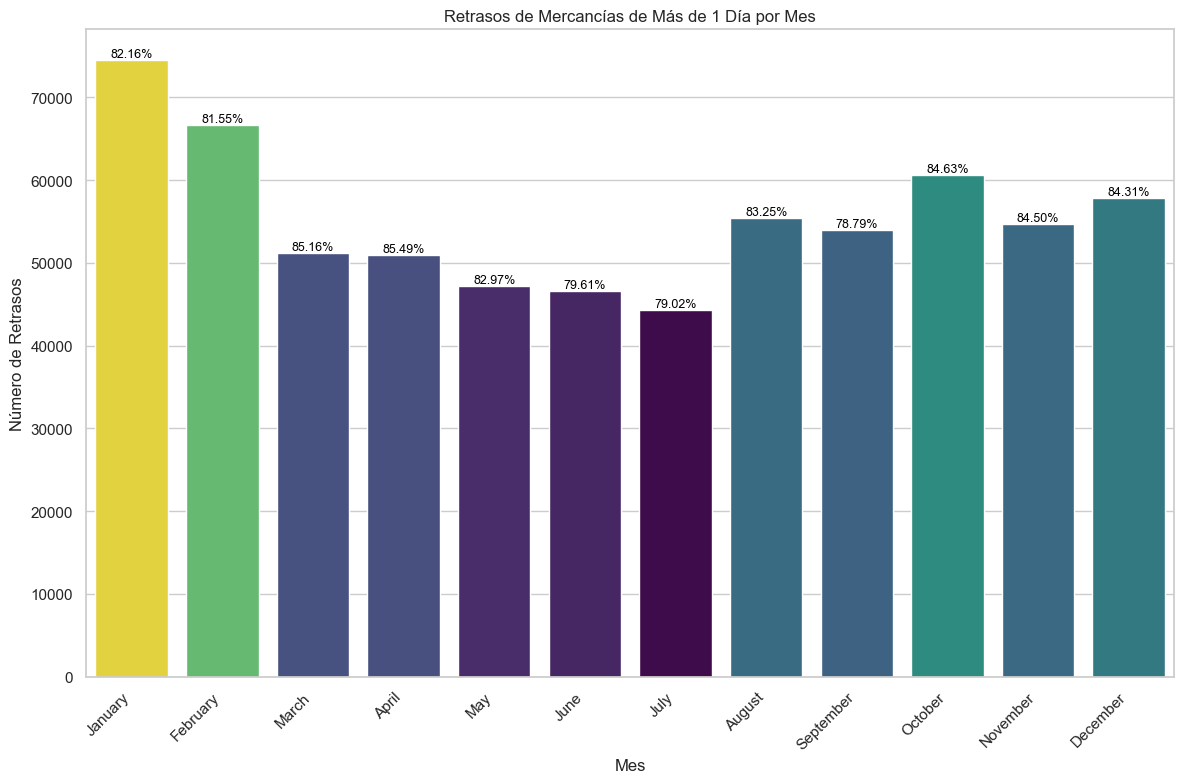

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import timedelta

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Filtrar las transacciones con retraso de más de 1 día
transacciones_mas_un_dia = transacciones_filtradas[transacciones_filtradas['delay_time'] > timedelta(days=1)]

# Agrupar los datos de retrasos por mes y calcular el total de retrasos para cada mes
retrasos_por_mes = transacciones_mas_un_dia.groupby(transacciones_mas_un_dia['complete_date'].dt.strftime('%B'))['delay_time'].count()

# Ordenar los meses cronológicamente
meses_orden = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
retrasos_por_mes = retrasos_por_mes.reindex(meses_orden)

# Calcular el total de transacciones por mes
total_transacciones_por_mes = transacciones_filtradas.groupby(transacciones_filtradas['complete_date'].dt.strftime('%B'))['delay_time'].count()

# Calcular el porcentaje de retrasos para cada mes
porcentaje_retrasos_por_mes = (retrasos_por_mes / total_transacciones_por_mes) * 100

# Normalizar los datos de retrasos para la asignación de colores
norm = plt.Normalize(retrasos_por_mes.min(), retrasos_por_mes.max())
colors = plt.cm.viridis(norm(retrasos_por_mes))  # Usar paleta 'viridis'

# Crear un gráfico de barras para visualizar los retrasos por mes
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=retrasos_por_mes.index, y=retrasos_por_mes, palette=colors)
plt.title('Retrasos de Mercancías de Más de 1 Día por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Retrasos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad

# Agregar etiquetas con el porcentaje de retrasos encima de cada barra
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            f'{porcentaje_retrasos_por_mes[idx]:.2f}%', ha="center", va='bottom', color='black', fontsize=9)

plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()




### Visualización de los provedores con más retrasos en un TOP 10

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/4279427010.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/4279427010.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/4279427010.py:28: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



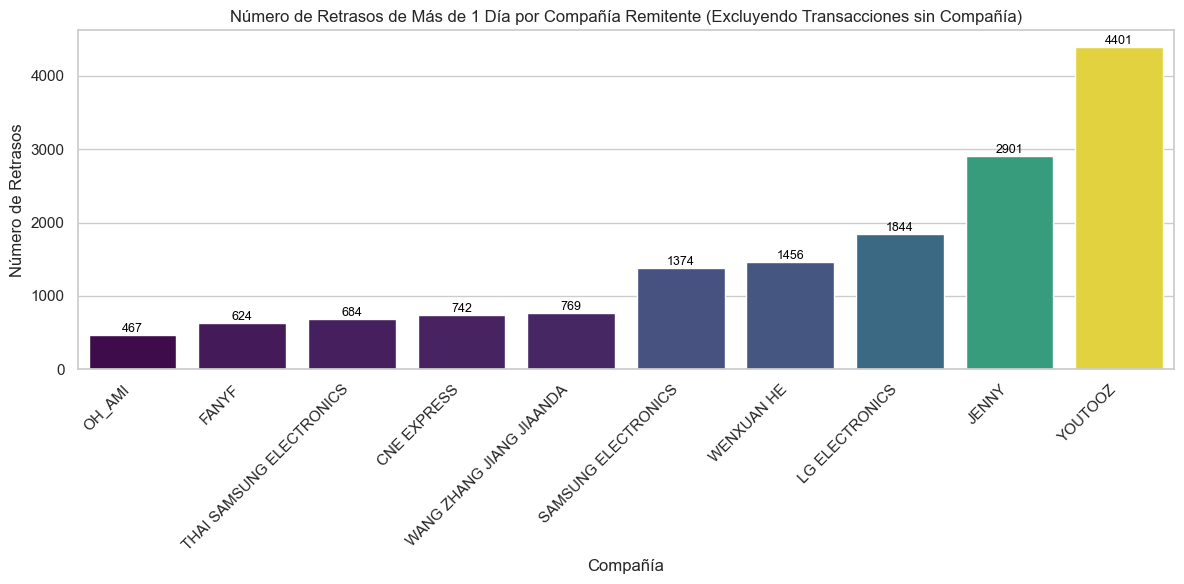

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'shipper_name' a tipo string
transacciones_filtradas['shipper_name'] = transacciones_filtradas['shipper_name'].astype(str)

# Filtrar las transacciones con retraso de más de 1 día y que tengan una compañía válida
transacciones_mas_un_dia_con_compania = transacciones_filtradas[(transacciones_filtradas['delay_time'] > timedelta(days=1)) & (transacciones_filtradas['shipper_name'].notnull()) & (transacciones_filtradas['shipper_name'] != '')]

# Eliminar las filas con 'shipper_name' igual a '0'
transacciones_mas_un_dia_con_compania = transacciones_mas_un_dia_con_compania[transacciones_mas_un_dia_con_compania['shipper_name'] != '0']

# Contar el número de retrasos para cada compañía
retrasos_por_compania_emisora = transacciones_mas_un_dia_con_compania['shipper_name'].value_counts()

# Seleccionar las 10 compañías con más retrasos
retrasos_top_10 = retrasos_por_compania_emisora.head(10)

# Ordenar los datos de retrasos por empresa receptora para que la asignación de colores sea proporcional
retrasos_top_10_sorted = retrasos_top_10.sort_values()

# Normalizar los datos de retrasos para la asignación de colores
norm = plt.Normalize(retrasos_top_10_sorted.min(), retrasos_top_10_sorted.max())
colors = plt.cm.viridis(norm(retrasos_top_10_sorted.values))  # Usar paleta 'viridis'

# Crear un gráfico de barras para visualizar los retrasos por compañía
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=retrasos_top_10_sorted.index, y=retrasos_top_10_sorted, palette=colors)
plt.title('Número de Retrasos de Más de 1 Día por Compañía Remitente (Excluyendo Transacciones sin Compañía)')
plt.xlabel('Compañía')
plt.ylabel('Número de Retrasos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad

# Agregar etiquetas con el número de retrasos encima de cada barra
for p, value in zip(ax.patches, retrasos_top_10_sorted):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value}', ha="center", va='bottom', color='black', fontsize=9)

plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()



### Visualización de empresas receptoras con más retrasos en un TOP 10

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/434038157.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/434038157.py:15: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



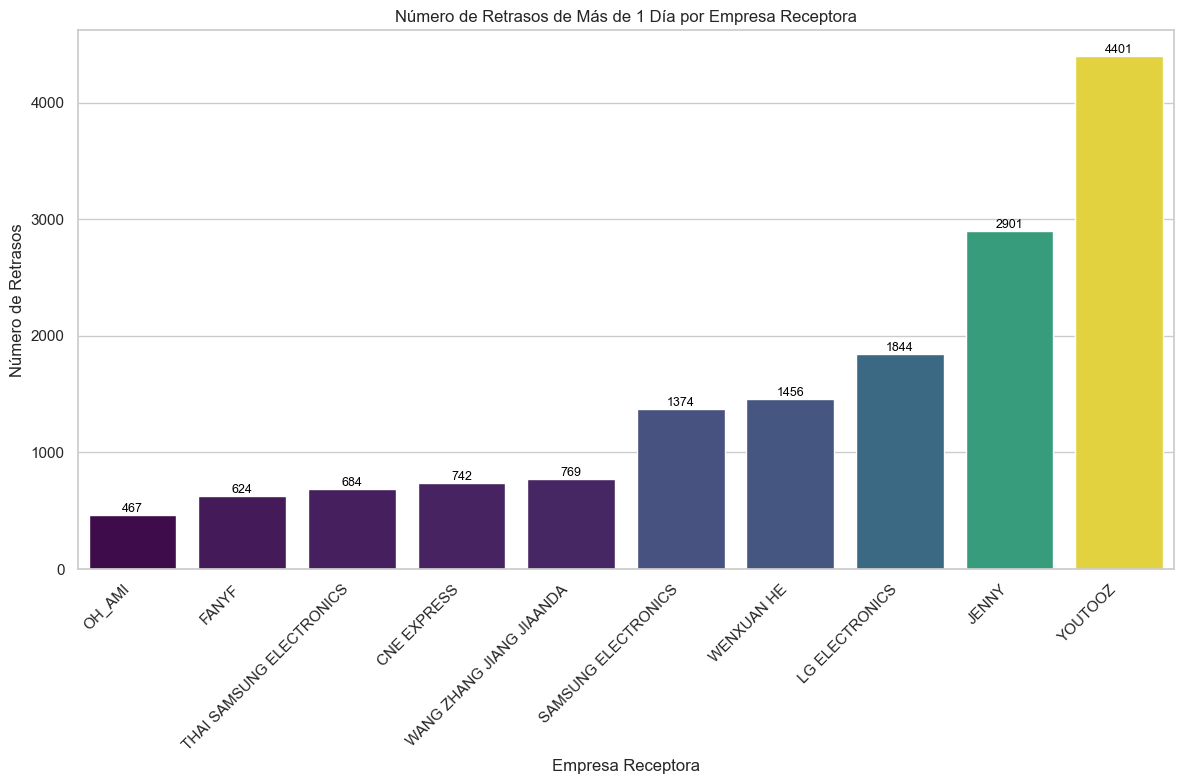

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Ordenar los datos de retrasos por empresa receptora para que la asignación de colores sea proporcional
retrasos_top_10_sorted = retrasos_top_10.sort_values()

# Definir una paleta de colores personalizada
custom_palette = sns.color_palette("Blues", len(retrasos_top_10_sorted))

# Crear un gráfico de barras para visualizar los retrasos por empresa receptora
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=retrasos_top_10_sorted.index, y=retrasos_top_10_sorted, palette=colors)
plt.title('Número de Retrasos de Más de 1 Día por Empresa Receptora')
plt.xlabel('Empresa Receptora')
plt.ylabel('Número de Retrasos')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad

# Agregar etiquetas con el número de retrasos encima de cada barra
for p, value in zip(ax.patches, retrasos_top_10_sorted):
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{value}', ha="center", va='bottom', color='black', fontsize=9)

plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()



### Relación de retrasos y peso de la mercancia.

In [ ]:
# Comprobación de unidad de medida del peso.
transacciones_mas_un_dia['weight']

0          18760.0
7            101.0
16          2075.0
17          6460.0
20           477.0
            ...   
1129159    12830.0
1129160    11062.0
1129161      670.0
1129163      969.0
1129164     4610.0
Name: weight, Length: 664116, dtype: float64

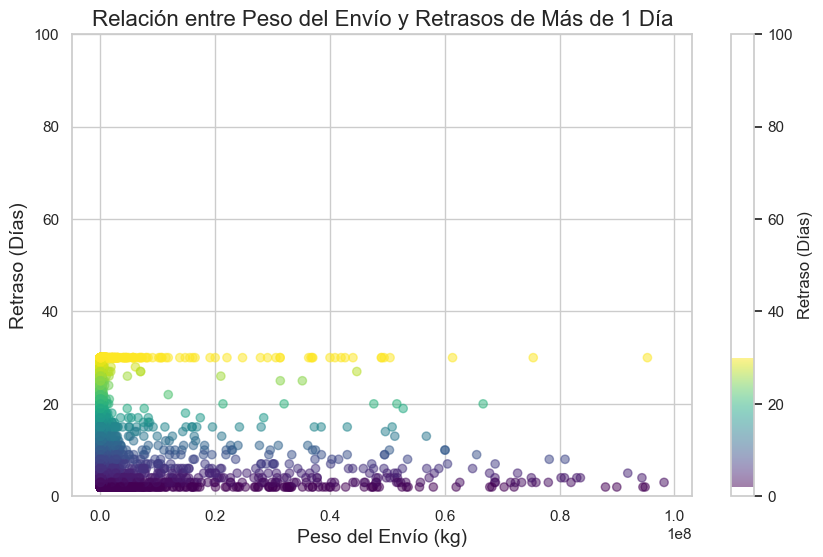

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Filtrar las transacciones con retraso de más de 1 día
transacciones_mas_un_dia = transacciones_filtradas[(transacciones_filtradas['delay_time'] > timedelta(days=1)) & (transacciones_filtradas['delay_time'] < timedelta(days=100))]

# Crear el diagrama de dispersión con la paleta de colores viridis
plt.figure(figsize=(10, 6))
plt.scatter(transacciones_mas_un_dia['weight'], transacciones_mas_un_dia['delay_time'].dt.days, c=transacciones_mas_un_dia['delay_time'].dt.days, cmap='viridis', alpha=0.5)

# Agregar etiquetas y título con el mismo estilo que los anteriores
plt.title('Relación entre Peso del Envío y Retrasos de Más de 1 Día', fontsize=16)
plt.xlabel('Peso del Envío (kg)', fontsize=14)
plt.ylabel('Retraso (Días)', fontsize=14)

# Establecer el límite máximo en el eje y
plt.ylim(0, 100)

# Añadir barra de color con límite máximo de 100 días
cbar = plt.colorbar()
ticks = np.linspace(0, 100, num=6)
cbar.set_ticks(ticks)
cbar.set_label('Retraso (Días)', fontsize=12)

# Mostrar el diagrama de dispersión
plt.show()



### Rutas con más retrasos

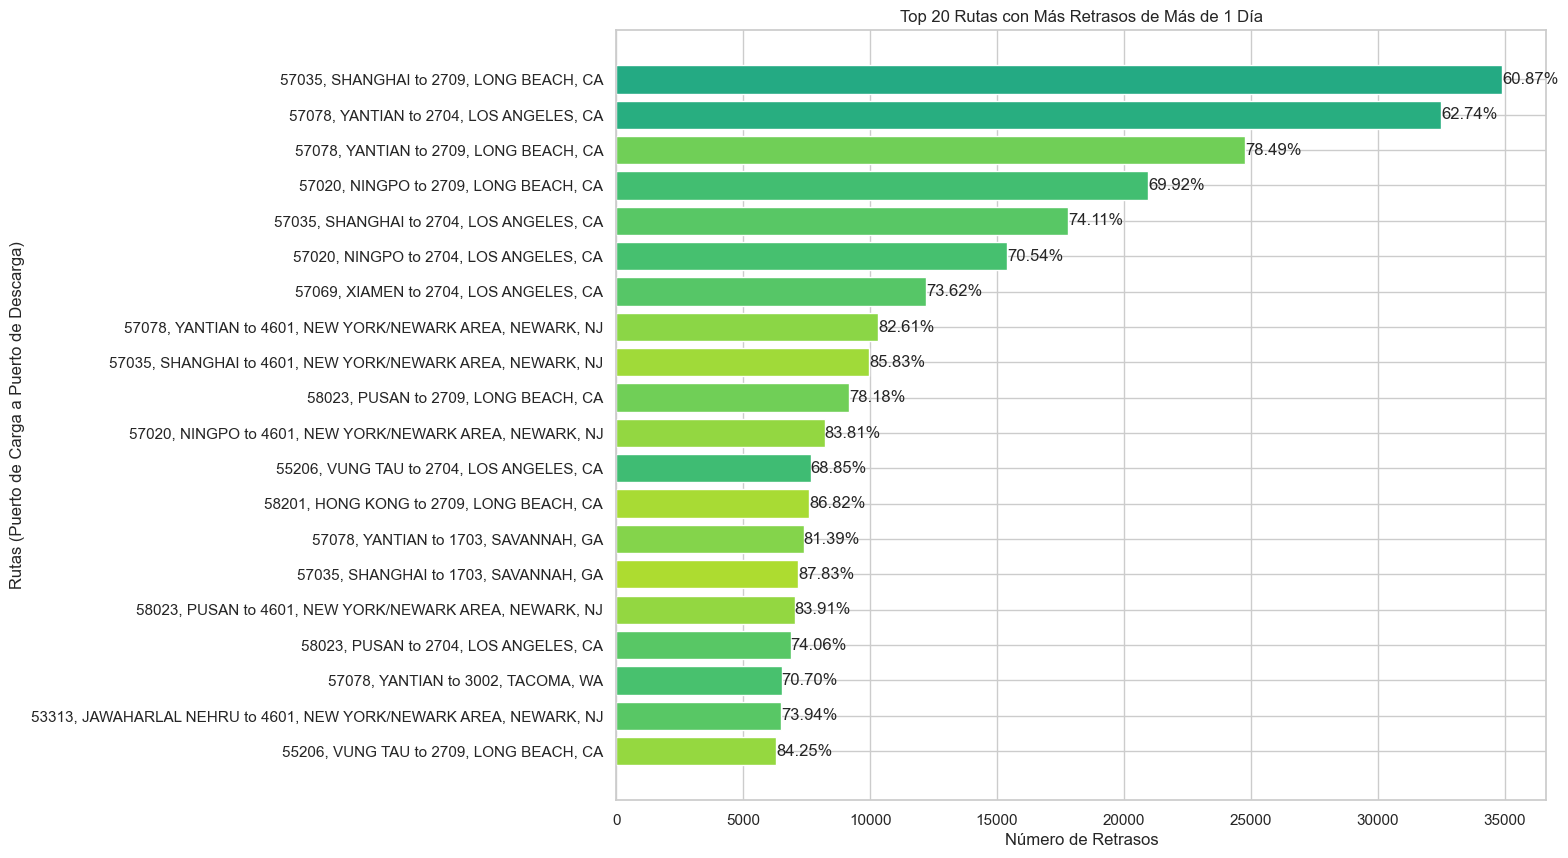

In [ ]:
import matplotlib.pyplot as plt

transacciones_retrasadas = transacciones[transacciones['delay_time'] >= timedelta(days=1)]


# Calcular el total de transacciones por ruta
total_transacciones_ruta = transacciones.groupby(['loading_port', 'unloading_port']).size().reset_index(name='Total Transacciones')

# Calcular el total de retrasos por ruta
retrasos_ruta = transacciones_retrasadas.groupby(['loading_port', 'unloading_port']).size().reset_index(name='Retrasos')

# Combinar los datos de total de transacciones y retrasos por ruta
merged_data = total_transacciones_ruta.merge(retrasos_ruta, on=['loading_port', 'unloading_port'], how='left')

# Calcular el porcentaje de retrasos por ruta
merged_data['Porcentaje de Retrasos'] = (merged_data['Retrasos'] / merged_data['Total Transacciones']) * 100

# Ordenar los datos por número de retrasos de manera descendente para obtener las rutas más problemáticas
merged_data = merged_data.sort_values(by='Retrasos', ascending=False)

# Seleccionar las top 20 rutas con más retrasos
top_20_routes = merged_data.head(20)

# Definir el tamaño del gráfico
plt.figure(figsize=(12, 10))

# Crear un gráfico de barras horizontales con estilo cmap='viridis'
bars = plt.barh(top_20_routes['loading_port'] + " to " + top_20_routes['unloading_port'], top_20_routes['Retrasos'], color=plt.cm.viridis(top_20_routes['Porcentaje de Retrasos'] / 100))

# Invertir el eje y para que las barras más largas aparezcan en la parte superior
plt.gca().invert_yaxis()

# Añadir títulos y etiquetas
plt.title('Top 20 Rutas con Más Retrasos de Más de 1 Día')
plt.xlabel('Número de Retrasos')
plt.ylabel('Rutas (Puerto de Carga a Puerto de Descarga)')

# Agregar porcentaje de retrasos en las etiquetas de las barras
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{top_20_routes.iloc[i]["Porcentaje de Retrasos"]:.2f}%', va='center')

# Mostrar el gráfico
plt.show()




### Retrasos por trimestre USA

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/1216892393.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/1216892393.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/1216892393.py:18: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

/var/folders/z3/hzk3_13n5c10wmqwhtszhh840000gn/T/ipykernel_28642/12168

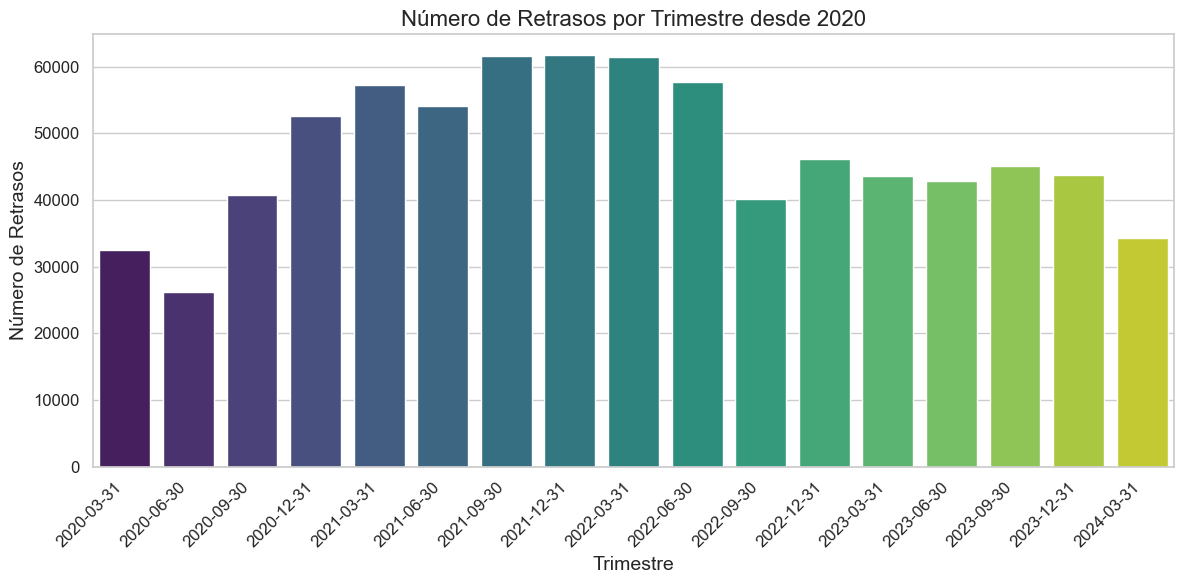

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Filtrar las transacciones a partir del año 2020
transacciones_desde_2020 = transacciones_filtradas[transacciones_filtradas['complete_date'].dt.year >= 2020]

# Calcular los retrasos
transacciones_desde_2020['retraso'] = transacciones_desde_2020['complete_date'] - transacciones_desde_2020['estimate_arrival_date']

# Convertir los retrasos a días
transacciones_desde_2020['retraso_dias'] = transacciones_desde_2020['retraso'].dt.days

# Agrupar los retrasos por trimestre y contar el número de retrasos en cada trimestre
retrasos_por_trimestre = transacciones_desde_2020.groupby(pd.Grouper(key='complete_date', freq='Q'))['retraso_dias'].count()

# Convertir el resultado en un DataFrame para facilitar la manipulación
retrasos_por_trimestre_df = retrasos_por_trimestre.reset_index(name='retrasos')

# Graficar los retrasos por trimestre con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=retrasos_por_trimestre_df, x='complete_date', y='retrasos', palette='viridis')
plt.xlabel('Trimestre', fontsize=14)
plt.ylabel('Número de Retrasos', fontsize=14)
plt.title('Número de Retrasos por Trimestre desde 2020', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotar y ajustar el tamaño de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de las etiquetas del eje y
plt.tight_layout()
plt.show()




### Código para realizar propuesta de rutas alternativas a los puertos con retraso

In [ ]:
import geopy.distance

# Coordenadas de los puertos de origen
coordenadas_puertos = {
    "2709, LONG BEACH, CA": (33.7670, 118.1892),
    "2704, LOS ANGELES, CA": (34.0522, 118.2437),
    "4601, NEW YORK/NEWARK AREA, NEWARK, NJ": (40.68447962939563, -74.16251352516548),
}

# Definir una función para calcular la distancia entre dos puntos geográficos
def calcular_distancia(coord_origen, coord_destino):
    return geopy.distance.geodesic(coord_origen, coord_destino).kilometers

# Definir una distancia máxima para considerar puertos cercanos (en kilómetros)
distancia_maxima_km = 200

# Puertos de destino en Estados Unidos
puertos_destino_usa = ['Los Angeles', 'Long Beach', 'New York']

# Lista para almacenar las rutas alternativas
rutas_alternativas = []

# Iterar sobre los puertos de origen
for puerto_origen, coord_origen in coordenadas_puertos.items():
    for puerto_destino in puertos_destino_usa:
        # Obtener las coordenadas del puerto de destino en Estados Unidos (asumiendo que ya están disponibles)
        coord_destino = port_coordinates.get(puerto_destino)
        if coord_destino:
            # Calcular la distancia entre el puerto de origen y destino
            distancia = calcular_distancia(coord_origen, coord_destino)
            # Si la distancia está dentro del rango permitido, agregar como ruta alternativa
            if distancia <= distancia_maxima_km:
                rutas_alternativas.append((puerto_origen, puerto_destino, distancia))

# Mostrar las rutas alternativas encontradas
print("Rutas alternativas hacia Estados Unidos:")
for ruta in rutas_alternativas:
    print(f"Desde {ruta[0]} hasta {ruta[1]} - Distancia: {ruta[2]} km")



NameError: name 'port_coordinates' is not defined

### Código Web scraping para obtener los puertos y las coordenadas de USA

In [ ]:
import re
import requests
#from bs4 import BeautifulSoup

# URL de la página principal
#url = "https://www.searates.com/es/maritime/united_states"

# Realizar la solicitud HTTP
response = requests.get(url)

# Diccionario para almacenar las coordenadas de los puertos
port_coordinates = {}

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar todos los enlaces que redirigen a las páginas de información de cada puerto
    port_links = soup.find_all('a', href=lambda href: href and '/es/port/' in href)

    # Recorrer los enlaces y obtener la información de cada página
    for link in port_links:
        port_name = link.text.strip()  # Obtener el nombre del puerto desde el texto del enlace
        port_url = "https://www.searates.com" + link['href']
        port_response = requests.get(port_url)
        if port_response.status_code == 200:
            port_soup = BeautifulSoup(port_response.content, 'html.parser')
            # Encontrar la información deseada en la página del puerto utilizando regex
            incoterms_info = port_soup.find('span', class_='incoterms-block__text', text=re.compile(r'\d+\.\d+,\s*-\d+\.\d+'))
            if incoterms_info:
                coordinates = incoterms_info.text.strip()
                port_coordinates[port_name] = coordinates  # Almacenar las coordenadas en el diccionario
                
            else:
                print(f"No se encontraron coordenadas para el puerto: {port_name}")
        else:
            print(f"No se pudo acceder a la página del puerto: {port_name}")
else:
    print(f"No se pudo acceder a la página principal: {url}")

# Imprimir el diccionario con las coordenadas de los puertos
print("Diccionario de coordenadas de puertos:", port_coordinates)


NameError: name 'url' is not defined

In [ ]:
port_coordinates

{'Adak': '51.8666667, -176.6666667',
 'Akutan': '54.1626466, -165.8594259',
 'Alabama Inland Ports': '32.4166667, -87.0333333',
 'Aladdin': '44.38, -104.1',
 'Alameda': '37.7568964, -122.2564929',
 'Alamogordo': '32.53, -105.57',
 'Algonac': '42.6313121, -82.5194427',
 'Allegan': '42.528314, -85.85168',
 'Alliance': '31.31, -93.39',
 'Almena': '45.25, -92.01',
 'Amsterdam': '38.2, -94.35',
 'Anacortes': '48.5166667, -122.6',
 'Anadarko': '35.04, -98.14',
 'Anaheim': '33.5, -117.54',
 'Anchorage': '61.2166667, -149.8833333',
 'Anchorville': '42.41, -82.41',
 'Angoon': '57.5810754, -134.6107992',
 'Apalachicola': '29.7181565, -85.0060209',
 'Appleton': '43.19, -78.39',
 'Archbold': '41.31, -84.18',
 'Arkansas City': '33.36, -91.12',
 'Ashburn': '39.03, -77.29',
 'Ash Grove': '38.46, -107.57',
 'Ashland': '46.5833333, -90.8666667',
 'Ashtabula': '41.9, -80.8',
 'Astatula': '28.42, -81.43',
 'Astoria': '46.27711, -124.0441583',
 'Atlanta': '33.7679192, -84.560689',
 'Atreco': '29.9851179, 

In [ ]:
import seaborn as sns

In [10]:
sns.heatmap(transacciones_filtradas.corr())

NameError: name 'transacciones_filtradas' is not defined